<a href="https://colab.research.google.com/github/ftltnbs/Cluestering_Analysis_Customers_Segmentation_Project/blob/master/Cluestering_Analysis_Customers_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install skimpy

from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 41.5 MB/s 
     |████████████████████████████████| 51 kB 5.7 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [84]:
          !pip install git+https://github.com/google/starthinker


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/google/starthinker to /tmp/pip-req-build-lp20jptg
  Running command git clone -q https://github.com/google/starthinker /tmp/pip-req-build-lp20jptg
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 398 kB 44.0 MB/s 
     |████████████████████████████████| 119 kB 47.4 MB/s 
     |████████████████████████████████| 229 kB 46.3 MB/s 
     |████████████████████████████████| 75 kB 4.9 MB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 26.9 MB 1.5 MB/s 
     |████████████████████████████████| 1.0 MB 50.0 MB/s 
     |████████████████████████████████| 212 kB 46.0 MB/s 
     |████████████████████████████████| 4.0 MB 39.8 MB/s 
     |████████████████████████████████| 594 kB 42.1 MB/s 
     |████████████████████████████████| 856 kB 48.3 MB/s 
     |████████████████████████████

In [4]:
sns.set_style("whitegrid")

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
random_state=42

#### Load Dataset

In [7]:
df_origin = pd.read_csv('https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Datasets/Mall_Customers.csv?raw=true', index_col='CustomerID')
df = df_origin.copy()
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


#### Explore Data

You can rename columns to more usable, if you need.

In [8]:
df = (clean_columns(df))

In [9]:
df.shape

(200, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                200 non-null    object
 1   age                   200 non-null    int64 
 2   annual_income_k_$     200 non-null    int64 
 3   spending_score_1_100  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
(df.isna().mean()*100)

gender                  0.0
age                     0.0
annual_income_k_$       0.0
spending_score_1_100    0.0
dtype: float64

In [14]:
df.describe().T.style.background_gradient(cmap='PiYG_r', axis=1)

,count,mean,std,min,25%,50%,75%,max
age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
annual_income_k_$,200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
spending_score_1_100,200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [15]:
df.describe(include='O').T

,count,unique,top,freq
gender,200,2,Female,112


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [16]:
numeric = df.select_dtypes('number').columns

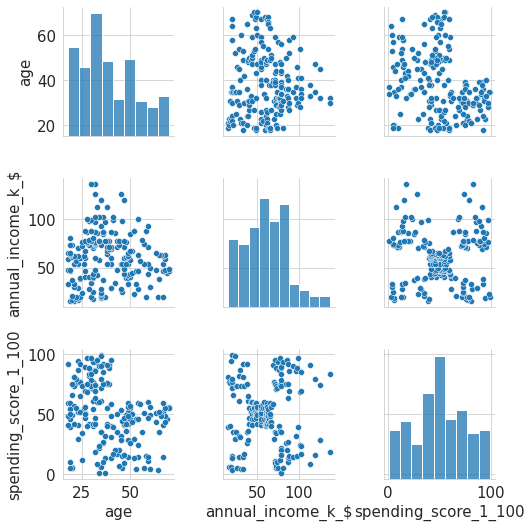

In [17]:
sns.pairplot(df)
plt.show();

In [18]:
pd.concat([df.skew(axis=0, skipna=True), df.kurtosis(axis=0, skipna=True)], axis=1, keys=['skew', 'kurtosis'])

,skew,kurtosis
age,0.485569,-0.671573
annual_income_k_$,0.321843,-0.098487
spending_score_1_100,-0.047220,-0.826629


In [19]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

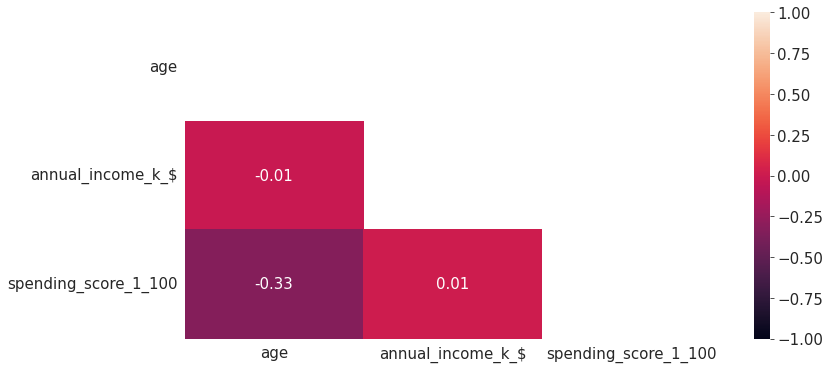

In [20]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)
plt.show();

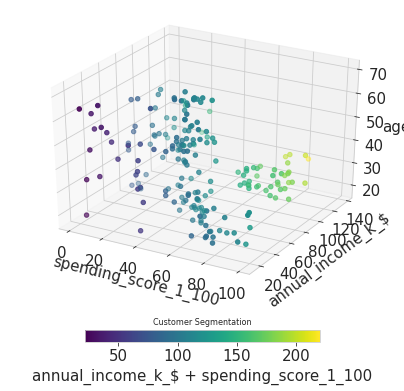

In [21]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['spending_score_1_100'], df['annual_income_k_$'], df['age'],  
    c=df['annual_income_k_$']+df['spending_score_1_100'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('spending_score_1_100')
ax.set_ylabel('annual_income_k_$')
ax.set_zlabel('age')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='annual_income_k_$ + spending_score_1_100',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show();

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [23]:
!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [24]:
X = df.iloc[:, [1,3]]
X.shape

(200, 2)

In [25]:
X.head()

,age,spending_score_1_100
CustomerID,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40


#### *ii. Determine optimal number of clusters*

In [26]:
K = range(2,10)

ssd = [] 

for k in K:
    model = KMeans(
        n_clusters=k,
        random_state=random_state,
    )
    model.fit(X)

    ssd.append(model.inertia_)
ssd

[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23838.248821646186,
 19483.1179104427,
 15514.19313435103,
 13006.483628851018,
 11738.02029695451]

### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [27]:
from sklearn.metrics import silhouette_score

for k in K:
    model = KMeans(
        n_clusters=k,
        random_state=random_state,
    )
    model.fit(X)
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116


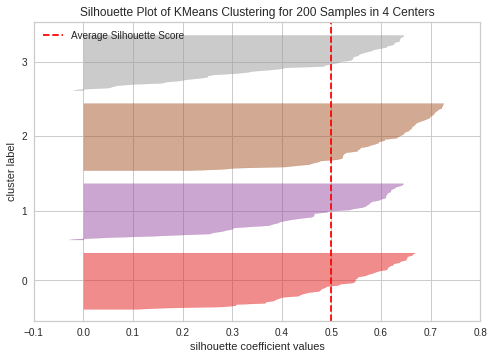

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(
    n_clusters=4,
    random_state=random_state,
)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X)    
visualizer.poof();

#### *iii. Apply K Means*

In [29]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(
    n_clusters=4,
    random_state=random_state
)
kmeans_model.fit(X)

KMeans(n_clusters=4, random_state=42)

#### *iv. Visualizing and Labeling All the Clusters*

In [30]:
kmeans_model.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [31]:
X["predicted_clusters"] = kmeans_model.labels_
X["predicted_clusters"].value_counts()

2    57
1    48
0    48
3    47
Name: predicted_clusters, dtype: int64

In [32]:
X

,age,spending_score_1_100,predicted_clusters
CustomerID,,,
1,19,39,3
2,21,81,2
3,20,6,1
4,23,77,2
5,31,40,3
...,...,...,...
196,35,79,2
197,45,28,1
198,32,74,2


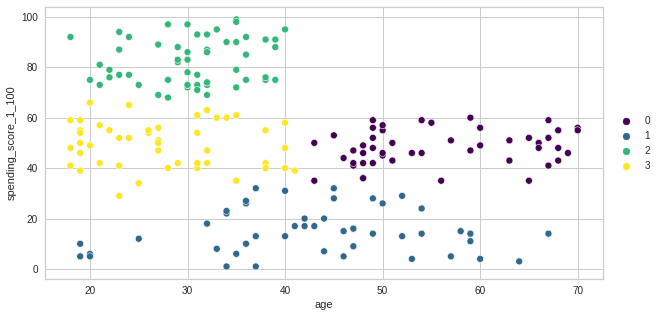

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["age"], X["spending_score_1_100"], hue= X["predicted_clusters"], palette= "viridis")
plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.show();

In [35]:
centers = kmeans_model.cluster_centers_
pd.DataFrame(centers)

,0,1
0,55.708333,48.229167
1,43.291667,15.020833
2,30.175439,82.350877
3,27.617021,49.148936


In [36]:
centers[:,0] 

array([55.70833333, 43.29166667, 30.1754386 , 27.61702128])

In [37]:
centers[:,1] 

array([48.22916667, 15.02083333, 82.35087719, 49.14893617])

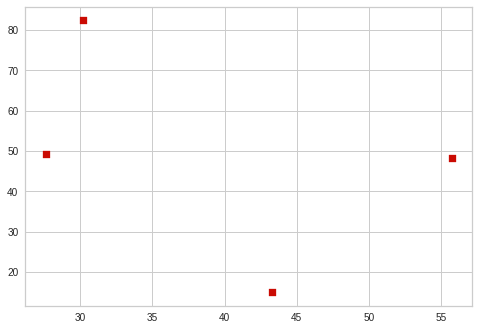

In [38]:
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.show();

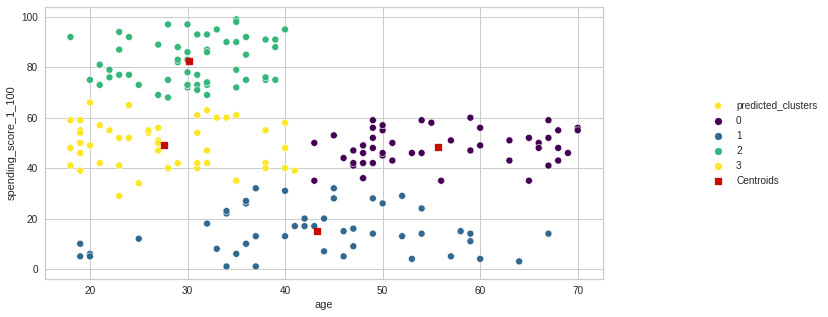

In [39]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x="age", y="spending_score_1_100", 
    data=X, 
    hue= "predicted_clusters", 
    palette= "viridis", 
    label='predicted_clusters'
)
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show();

In [40]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3
age,55.708333,43.291667,30.175439,27.617021
spending_score_1_100,48.229167,15.020833,82.350877,49.148936


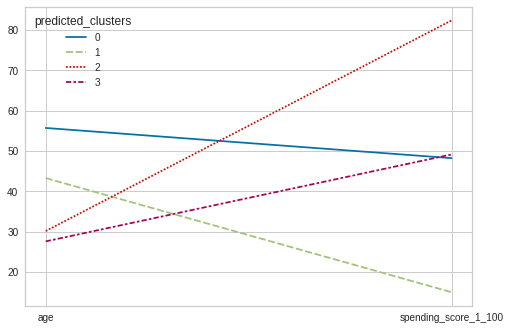

In [42]:
sns.lineplot(data=clus_pred)
plt.show();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [46]:
X.shape

(200, 3)

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=StandardScaler()
)

#### *ii. Determine optimal number of clusters*

In [49]:
K = range(2,10)

ssd = [] 

for k in K:
    kmeans_model = KMeans(
        n_clusters=k,
        random_state=random_state,
    )
    model = Pipeline([
        ('OneHotEncoder', column_trans),
        ('kmeans', kmeans_model)
    ])
    model.fit(X)
    ssd.append(model['kmeans'].inertia_)
ssd

[237.62585186222867,
 158.67571127121352,
 93.54002390157117,
 71.95941103323182,
 57.066264151947365,
 47.782397257555985,
 41.01807354808898,
 34.52004757866084]

#### *iii. Apply K Means*

In [50]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

kmeans_model = KMeans(
    n_clusters=5,
    random_state=random_state
)
pipe_kmeans = Pipeline([
    ('OneHotEncoder', column_trans),
    ('kmeans', kmeans_model)
])
pipe_kmeans.fit(X)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

#### *iv. Visualizing and Labeling All the Clusters*

In [51]:
pipe_kmeans['kmeans'].labels_

array([4, 0, 3, 0, 4, 0, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 4, 4, 2, 0, 4, 0,
       2, 0, 2, 0, 2, 4, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 1, 0, 1, 4,
       2, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 3, 0, 2, 0, 3, 0, 2, 0, 4, 0, 3, 0, 1, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 3, 0, 3, 0, 1, 0, 3, 0, 2, 0, 3, 0, 3, 4, 3, 0, 3, 0, 2, 0,
       2, 0, 2, 0, 3, 0, 2, 0, 4, 0, 2, 0, 3, 0, 3, 0, 3, 0, 2, 0, 2, 0,
       3, 0], dtype=int32)

In [52]:
X["predicted_clusters"] = pipe_kmeans['kmeans'].labels_
X["predicted_clusters"].value_counts()

0    57
1    48
4    47
2    26
3    22
Name: predicted_clusters, dtype: int64

In [53]:
X

,age,spending_score_1_100,predicted_clusters
CustomerID,,,
1,19,39,4
2,21,81,0
3,20,6,3
4,23,77,0
5,31,40,4
...,...,...,...
196,35,79,0
197,45,28,2
198,32,74,0


In [55]:
centers = pipe_kmeans['kmeans'].cluster_centers_
pd.DataFrame(centers)

,0,1,2
0,-0.622545,1.248147,0.442784
1,1.209867,-0.076511,-1.383129
2,0.935451,-1.354574,-0.470173
3,-0.410049,-1.378871,-0.470173
4,-0.806154,-0.040804,1.355740


In [56]:
centers[:,0]

array([-0.62254456,  1.20986678,  0.9354512 , -0.41004877, -0.8061537 ])

In [57]:
centers[:,1]

array([ 1.24814723, -0.07651083, -1.35457384, -1.37887125, -0.04080394])

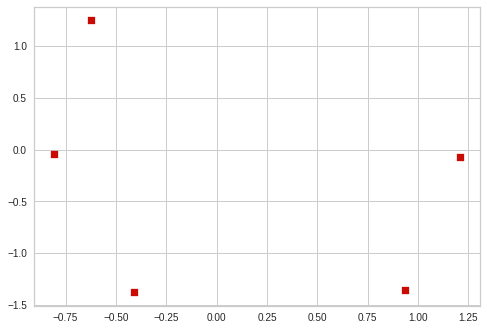

In [58]:
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.show();

In [60]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3,4
age,30.175439,55.708333,51.884615,33.136364,27.617021
spending_score_1_100,82.350877,48.229167,15.307692,14.681818,49.148936


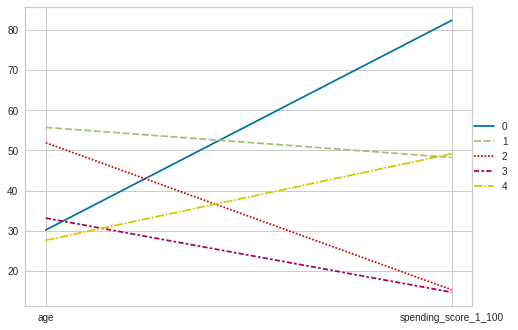

In [61]:
sns.lineplot(data=clus_pred)
plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.show();

In [62]:
X["labels"] = X['predicted_clusters'].map({
    0:"medium_income_medium_spent",
    1:"high_income_low_spent",
    2:"low_income_low_spent",
    3:"low_income_high_spent",
    4:"high_income_high_spent"
})
X

,age,spending_score_1_100,predicted_clusters,labels
CustomerID,,,,
1,19,39,4,high_income_high_spent
2,21,81,0,medium_income_medium_spent
3,20,6,3,low_income_high_spent
4,23,77,0,medium_income_medium_spent
5,31,40,4,high_income_high_spent
...,...,...,...,...
196,35,79,0,medium_income_medium_spent
197,45,28,2,low_income_low_spent
198,32,74,0,medium_income_medium_spent


### Hierarchical Clustering

In [64]:
df

,gender,age,annual_income_k_$,spending_score_1_100
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [65]:
X1 = df.iloc[:, [1,3]]
X1

,age,spending_score_1_100
CustomerID,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40
...,...,...
196,35,79
197,45,28
198,32,74


## Clustering based on Annual Income and Spending 

1.   List item
2.   List item

Score- x2

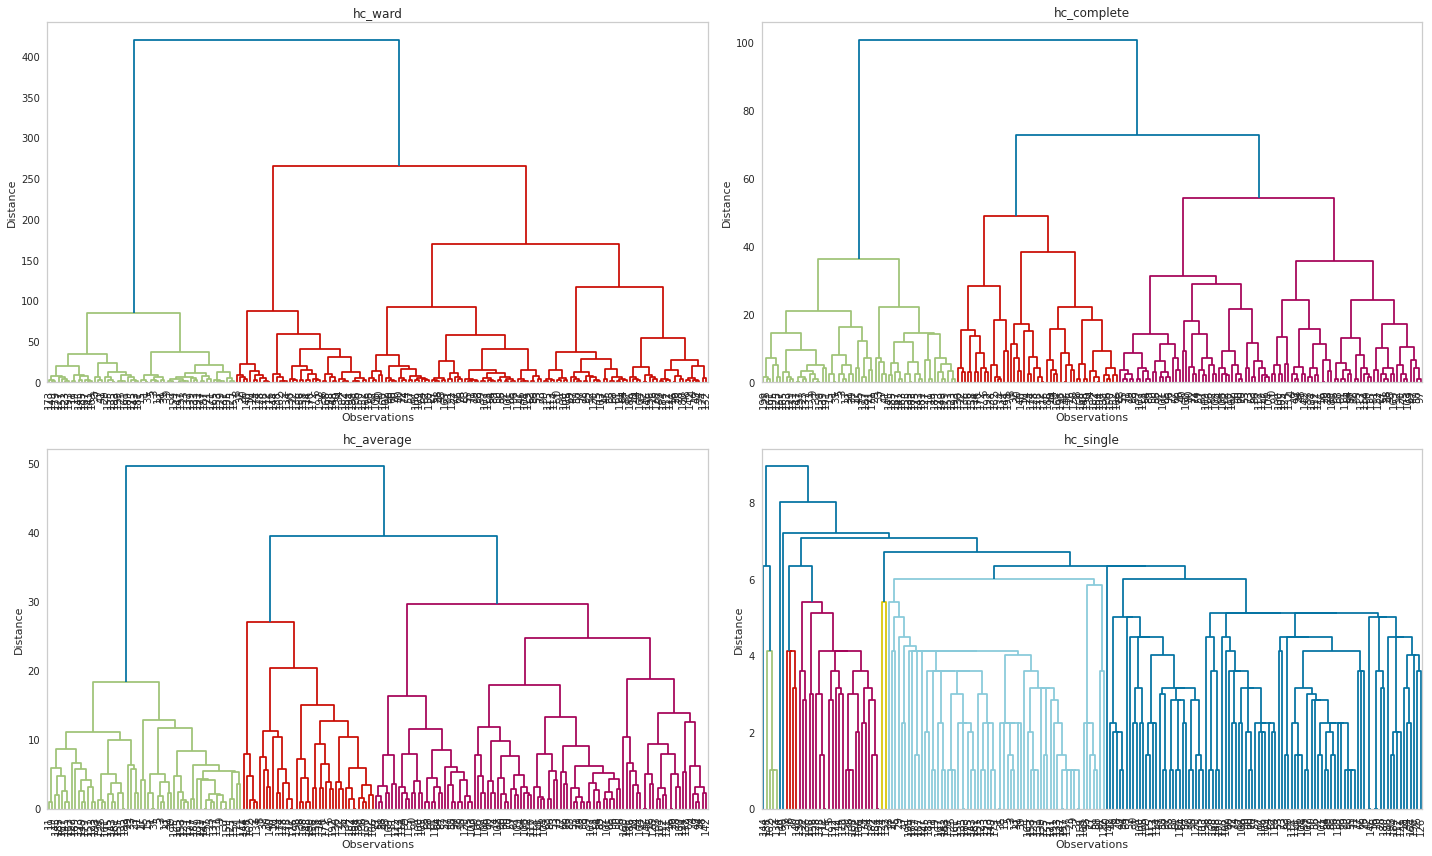

In [66]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

hc_ward     = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete") 
hc_average  = linkage(X1, "average")
hc_single   = linkage(X1, "single")

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1)     
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10)
    plt.tight_layout()

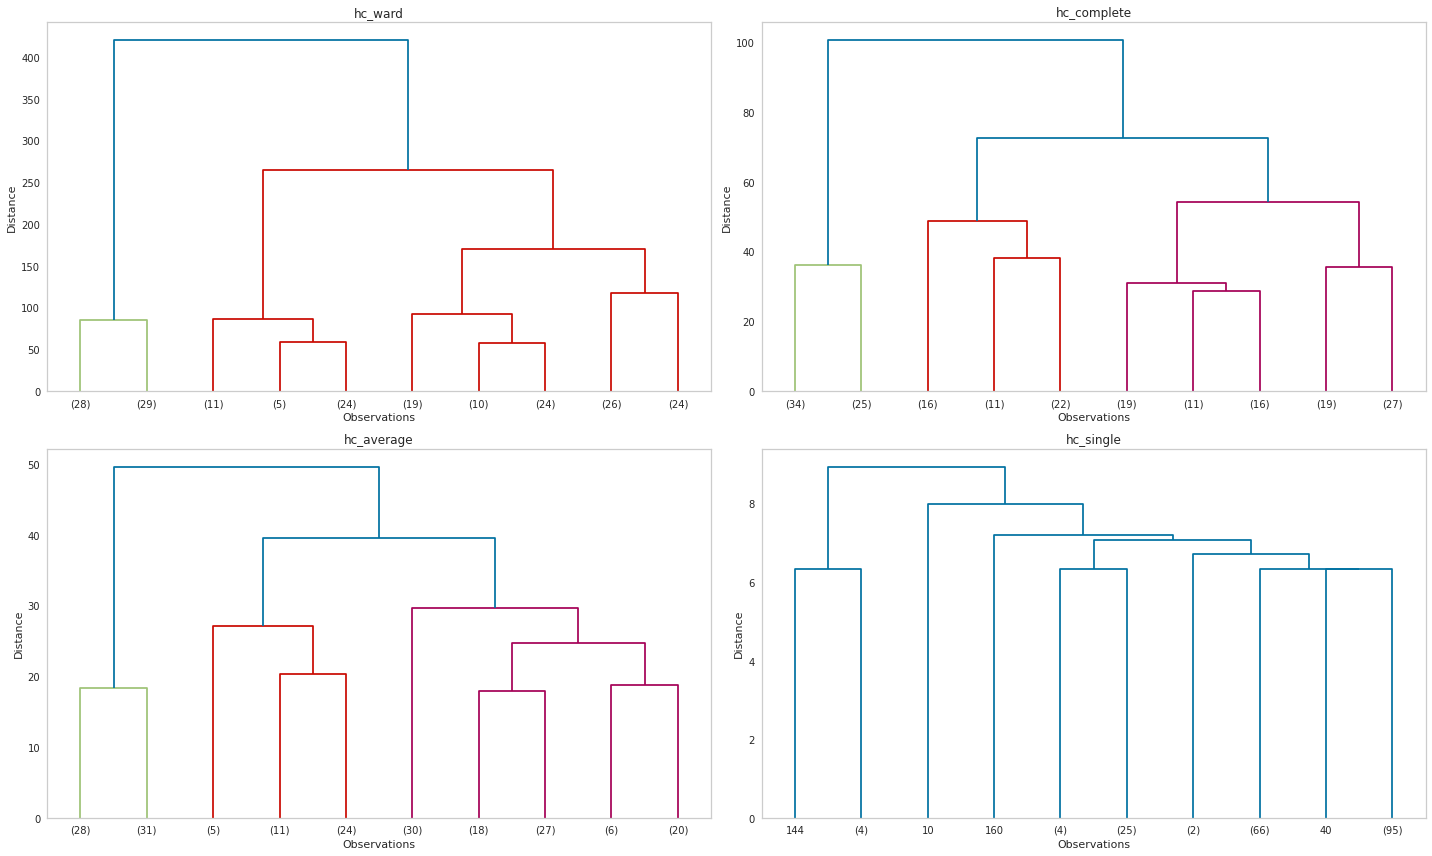

In [67]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    # truncate_mode='lastp', p=10(10 küme gösterir)
    dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)
    plt.tight_layout()

### ii. *Apply Agglomerative Clustering*

In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


## Clustering based on Annual Income and Spending 

1.   List item
2.   List item

Score- x2

In [69]:
X2 = df.iloc[:, [2,3]]
X2

,annual_income_k_$,spending_score_1_100
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


#### Age and Spending Score- x1

In [70]:
model1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model1.fit(X1)
model1.labels_
X1['labels'] = model1.labels_
X1

,age,spending_score_1_100,labels
CustomerID,,,
1,19,39,0
2,21,81,1
3,20,6,2
4,23,77,1
5,31,40,0
...,...,...,...
196,35,79,1
197,45,28,0
198,32,74,1


Text(0.5, 1.0, 'Predicted Clusters')

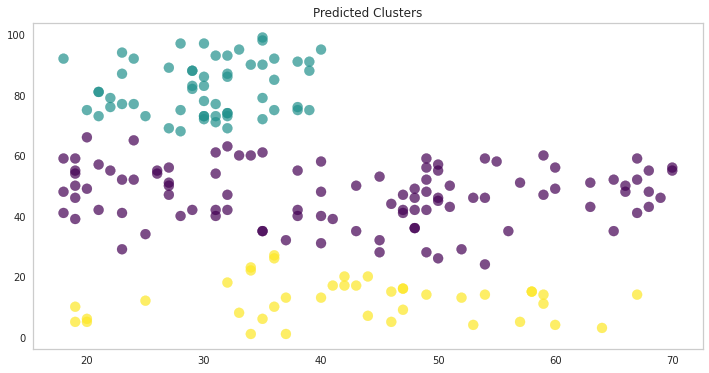

In [71]:
plt.figure(figsize=(12,6))
plt.scatter(X1["age"], X1["spending_score_1_100"], c=X1['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

#### Annual Income and Spending Score- x2

In [72]:
model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model2.fit(X2)
model2.labels_
X2['labels'] = model2.labels_
X2

,annual_income_k_$,spending_score_1_100,labels
CustomerID,,,
1,15,39,4
2,15,81,3
3,16,6,4
4,16,77,3
5,17,40,4
...,...,...,...
196,120,79,2
197,126,28,0
198,126,74,2


Text(0.5, 1.0, 'Predicted Clusters')

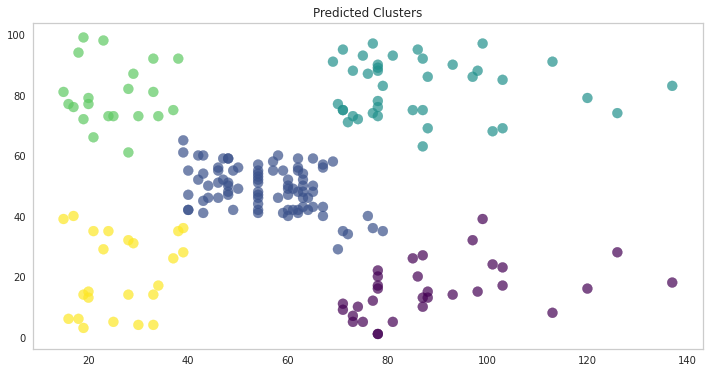

In [73]:
plt.figure(figsize=(12,6))
plt.scatter(X2["annual_income_k_$"], X2["spending_score_1_100"], c=X2['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [74]:
clus_pred = X1.groupby("labels").mean().T
clus_pred

labels,0,1,2
age,42.174757,30.175439,42.650
spending_score_1_100,47.135922,82.350877,12.275


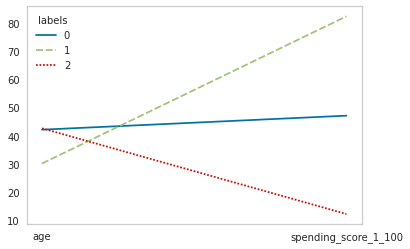

In [75]:
sns.lineplot(data=clus_pred)

### Interpretation based on Annual Income and Spending Score- x2

In [77]:
clus_pred = X2.groupby("labels").mean().T
clus_pred

labels,0,1,2,3,4
annual_income_k_$,89.40625,55.811765,86.538462,25.095238,26.304348
spending_score_1_100,15.59375,49.129412,82.128205,80.047619,20.913043


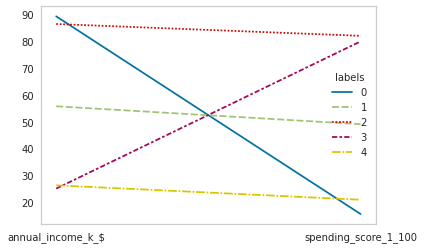

In [78]:
sns.lineplot(data=clus_pred)

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___